In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
G = 6.67408e-11
C = 299792458
SEC_PER_DAY = 86400
EARTH_MASS = 5.9722e+24
EARTH_SURFACE_ACCEL = 9.81
EARTH_RADIUS = 6371.0 * 1000
EARTH_DENSITY = 5514
MOON_MASS = 0.07346e24
MOON_RADIUS = 1737.4 * 1000
MOON_EARTH_A = 0.3844e9
MOON_PERIOD = 27.3217 * SEC_PER_DAY
MOON_DENSITY = 3344
MOON_SURFACE_ACCEL = 1.62
M2_TO_MI2 = 1 / 2.59e+6
M_TO_MI = 1 / 0.000621371
JUPITER_RADIUS = (142984 * 1000 / 2)

In [3]:
def orbit(a, m):
    return 2 * np.pi * np.sqrt((a ** 3) / (G * m))

def accel(m, r):
    return G * m / r**2

def vol(r):
    return (4 / 3) * np.pi * r**3

def ang_size(r, d):
    return 2 * np.arctan2(r, d)

MOON_ANGULAR_SIZE = ang_size(MOON_RADIUS, MOON_EARTH_A)

In [4]:
np.rad2deg(MOON_ANGULAR_SIZE)

0.5179240868033436

In [5]:
def bisect(f, interval, tol=1e-4):
    x0, x1 = interval[0], interval[1]
    y0 = f(x0)
    y1 = f(x1)
    if np.sign(y0) == np.sign(y1):
        return
    i = 0
    while True:
        x2 = x0 + ((x1 - x0) / 2)
        y2 = f(x2)

        if -tol < y2 < tol:
            return x2
        if np.sign(y1) == np.sign(y2):
            x1 = x2
            y1 = y2
        else:
            x0 = x2
            y0 = y2


In [6]:
def from_surface_area(surface_area):
    radius = np.sqrt(surface_area / 4 / np.pi)
    mass = bisect(lambda m: accel(m, radius) - EARTH_SURFACE_ACCEL, [1e10, 1e24])
    surface_accel = accel(mass, radius)
    density = mass / vol(radius)

    return (surface_area, radius, mass, surface_accel, density)

def from_density(density):
    radius = bisect(lambda r: accel(density * vol(r), r) - EARTH_SURFACE_ACCEL, [1, EARTH_RADIUS * 10])
    mass = density * vol(radius)
    surface_accel = accel(mass, radius)
    surface_area = 4 * np.pi * radius**2

    return (surface_area, radius, mass, surface_accel, density)

In [7]:
p = np.linspace(2., 5.)
sa = [100 * from_density(EARTH_DENSITY * x)[0] / 510.1e12 for x in p]
rplot = [from_density(EARTH_DENSITY * x)[1] for x in p]

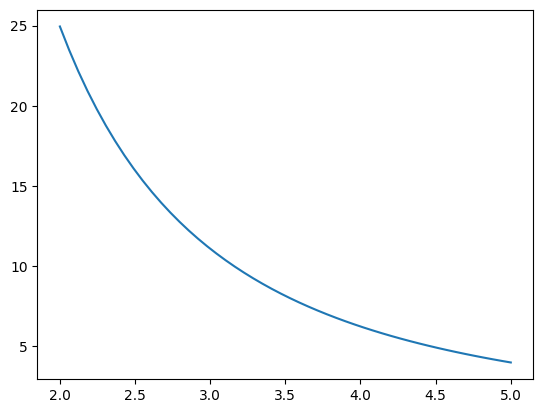

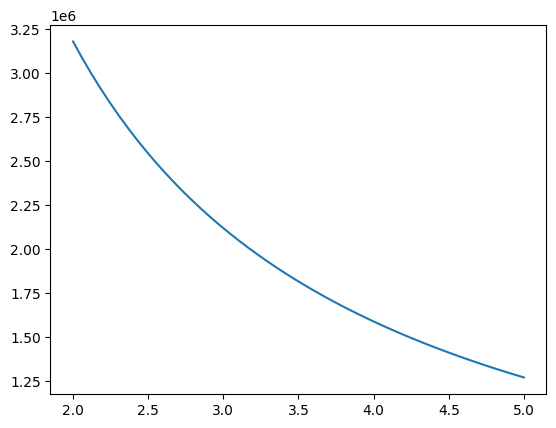

In [8]:
%matplotlib inline
plt.plot(p, sa)
plt.show()

plt.plot(p, rplot)
plt.show()

In [9]:
# surface_area, radius, mass, surface_accel, density = from_surface_area(4879. / 2 * 1000)
moon_surface_area, moon_radius, moon_mass, moon_surface_accel, moon_density = from_density(EARTH_DENSITY * 3.)
# surface_area, radius, mass, surface_accel, density = from_density(11. * 1000)
print(f'Surface Area:')
print(f'    {moon_surface_area:.5} m²')
print(f'    {moon_surface_area / 1000000:.5} km²')
print(f'    {moon_surface_area * M2_TO_MI2:.5} mi²')
print(f'    {100 * moon_surface_area / 510.1e12:.5}% Earth')
print(f'    {100 * moon_surface_area / 38e12:.5}% Moon')
print(f'    {100 * moon_surface_area * M2_TO_MI2 / 17.21e6:.5}% Asia')
print(f'    {100 * moon_surface_area * M2_TO_MI2 / 3.797e6:.5}% USA')
print(f'    {100 * moon_surface_area * M2_TO_MI2 / 6.602e6:.5}% Russia')
print(f'Radius:')
print(f'    {moon_radius:.5} m')
print(f'    {moon_radius / 1000:.5} km')
print(f'    {moon_radius * M_TO_MI:.5} mi')
print(f'    {100 * moon_radius / EARTH_RADIUS:.5}% Earth')
print(f'    {100 * moon_radius / MOON_RADIUS:.5}% Moon')
print(f'Mass:')
print(f'    {moon_mass:.5} kg')
print(f'    {100 * moon_mass / EARTH_MASS:.5}% Earth')
print(f'    {100 * moon_mass / MOON_MASS:.5}% Moon')
print(f'Density:')
print(f'    {moon_density:.5} kg/m³')
print(f'    {100 * moon_density / EARTH_DENSITY:.5}% Earth')
print(f'    {100 * moon_density / MOON_DENSITY:.5}% Moon')
print(f'    {100 * moon_density / 4287:.5}% stishovite')
print(f'    {100 * moon_density / 19300:.5}% Gold')
# print(f'Surface Acceleration:')
# print(f'    {surface_accel:.5} m/s²')
# print(f'    {100 * surface_accel / EARTH_SURFACE_ACCEL:.5}% Earth')
# print(f'    {100 * surface_accel / MOON_SURFACE_ACCEL:.5}% Moon')


Surface Area:
    5.6547e+13 m²
    5.6547e+07 km²
    2.1833e+07 mi²
    11.086% Earth
    148.81% Moon
    126.86% Asia
    575.01% USA
    330.7% Russia
Radius:
    2.1213e+06 m
    2121.3 km
    3.4139e+09 mi
    33.296% Earth
    122.1% Moon
Mass:
    6.6142e+23 kg
    11.075% Earth
    900.39% Moon
Density:
    1.6542e+04 kg/m³
    300.0% Earth
    494.68% Moon
    385.86% stishovite
    85.71% Gold


In [10]:
MOON_ANGULAR_SIZE

0.009039480590103259

In [11]:
def planet_density_calc(angular_size):
    a = 1277637455.283166
    radius = bisect(lambda r: ang_size(r, a) - angular_size, [1, 1e20])
    mass = bisect(lambda m: orbit(a, m) - SEC_PER_DAY, [1, 1e60])
    return mass / vol(radius)

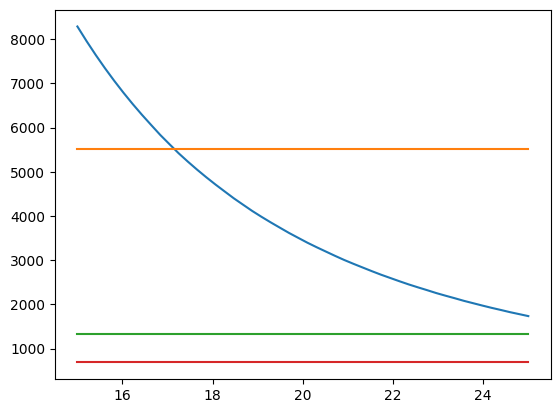

In [12]:
ang_sizes = np.linspace(np.deg2rad(15), np.deg2rad(25))
plt.plot(
    np.rad2deg(ang_sizes), [planet_density_calc(t) for t in ang_sizes],
    np.rad2deg(ang_sizes), [EARTH_DENSITY] * len(ang_sizes),
    np.rad2deg(ang_sizes), [1326] * len(ang_sizes),
    np.rad2deg(ang_sizes), [687] * len(ang_sizes),
)
plt.show()

In [13]:
planet_ang_size = np.deg2rad(15)

In [14]:
orbit_radii = np.linspace(MOON_EARTH_A * 0.8, MOON_EARTH_A * 2)

planet_radii = np.array([bisect(
    lambda r: ang_size(r, a) - planet_ang_size,
    [1, moon_mass * 1000])
 for a in orbit_radii])
planet_masses = np.array([bisect(lambda m: orbit(a, m) - SEC_PER_DAY, [1, 1e60]) for a in orbit_radii])
planet_densities = np.array([m / vol(r)  for m, r in zip(planet_masses, planet_radii)])


In [15]:
moon_ang_size = np.array([
    [
        np.rad2deg(ang_size(moon_radius, d)),
        np.rad2deg(ang_size(moon_radius, np.sqrt(3) *d))
    ] for d in orbit_radii]
) * 60 * 60

In [16]:
print(planet_density_calc(planet_ang_size))
print(np.average(planet_densities))


8287.710206612219
8290.245672698726


In [17]:
planet_density = planet_density_calc(planet_ang_size)
print(f'Density:')
print(f'    {planet_density:.5} kg/m³')
print(f'    {100 * planet_density / moon_density:.5}% its moon')
print(f'    {100 * planet_density / EARTH_DENSITY:.5}% Earth')
print(f'    {100 * planet_density / MOON_DENSITY:.5}% Moon')
print(f'    {100 * planet_density / 1638:.5}% Neptune')
print(f'    {100 * planet_density / 1326:.5}% Jupiter')
print(f'    {100 * planet_density / 19300:.5}% Gold')

Density:
    8287.7 kg/m³
    50.101% its moon
    150.3% Earth
    247.84% Moon
    505.97% Neptune
    625.02% Jupiter
    42.942% Gold


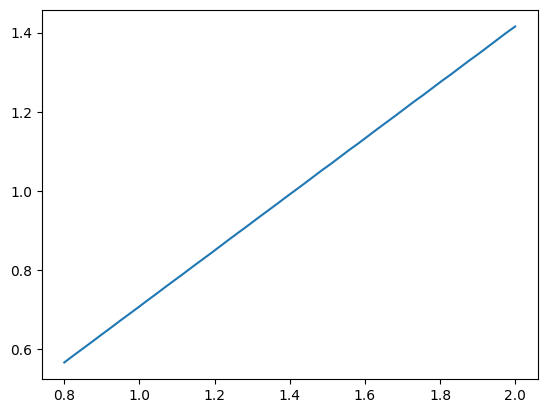

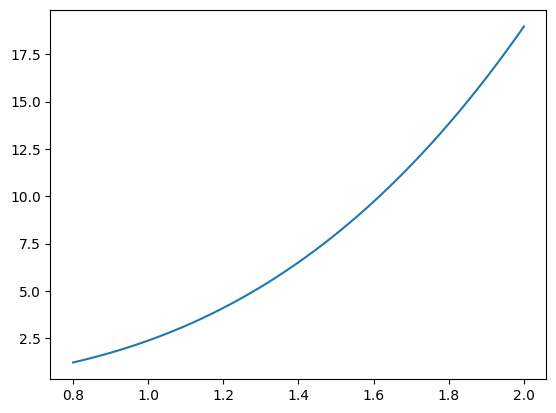

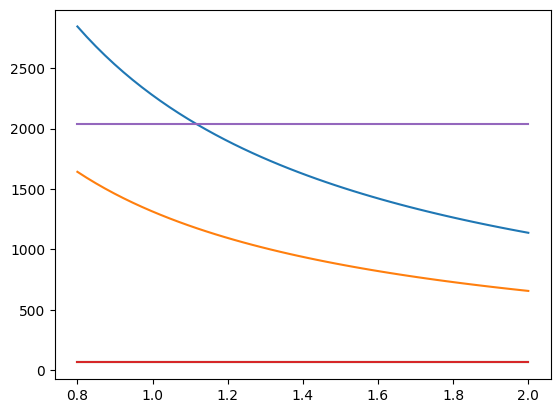

In [18]:
plotx = orbit_radii / MOON_EARTH_A

plt.plot(plotx, planet_radii / JUPITER_RADIUS)
plt.show()

plt.plot(plotx, planet_masses / 1898e24)
plt.show()

# plt.plot(plotx, orbit_radii / MOON_EARTH_A)
# plt.show()

plt.plot(
    plotx, [x[0] for x in moon_ang_size],
    plotx, [x[1] for x in moon_ang_size],
    plotx, [65] * len(plotx),
    plotx, [65] * len(plotx),
    plotx, [34 * 60] * len(plotx),
)
plt.show()